In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Charger les données
df = pd.read_csv(r"D:\projet_1\App.py\netflix_titles.csv")

# Nettoyer la colonne 'date_added'
df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Créer les colonnes 'year_added', 'month_added', 'year_month'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['year_month'] = df['date_added'].dt.to_period('M')

# Aperçu des données
print("Dimensions :", df.shape)
df.head()


Dimensions : (8807, 15)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,year_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,2021-09
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2021-09
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,2021-09
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,2021-09
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2021-09


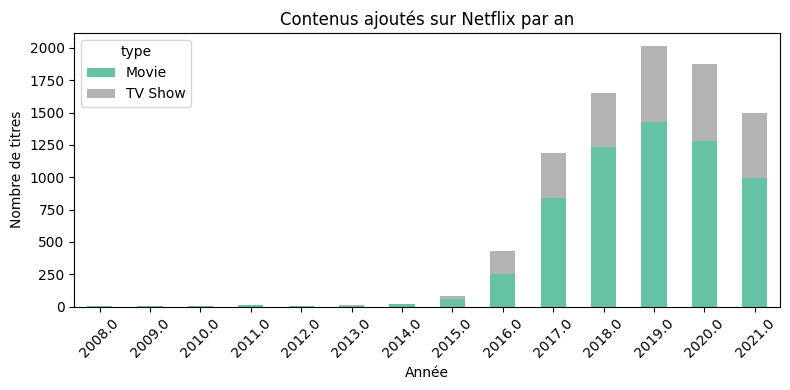

In [10]:
# Créer un dossier pour sauvegarder les graphiques
os.makedirs('images', exist_ok=True)

# Compter le nombre de titres par année et par type (Movie / TV Show)
df_year = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

# Tracer le graphique
df_year.plot(kind='bar', stacked=True, colormap='Set2', figsize=(8, 4))
plt.title("Contenus ajoutés sur Netflix par an")
plt.xlabel("Année")
plt.ylabel("Nombre de titres")
plt.xticks(rotation=45)
plt.tight_layout()

# Sauvegarde
plt.savefig("images/netflix_ajouts_par_an.png", dpi=150, bbox_inches='tight')
plt.show()


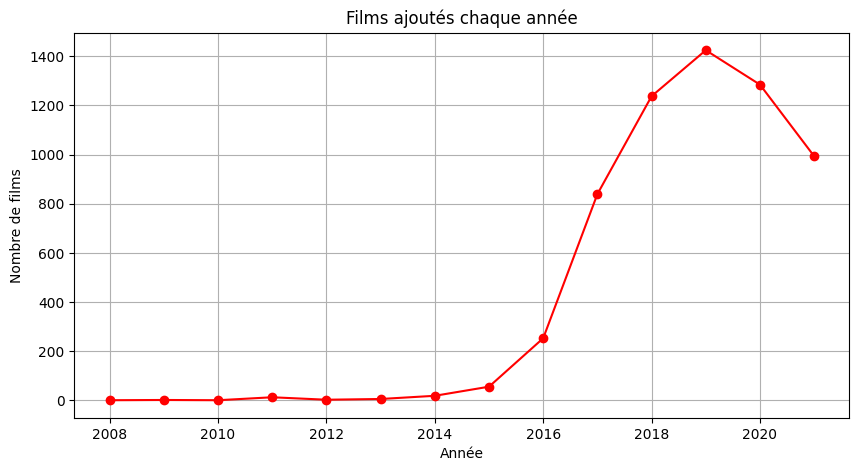

In [11]:
films = df[df['type'] == 'Movie']
films_per_year = films.groupby('year_added').size()

films_per_year.plot(kind='line', marker='o', color='red', figsize=(10, 5))
plt.title("Films ajoutés chaque année")
plt.xlabel("Année")
plt.ylabel("Nombre de films")
plt.grid(True)
plt.show()


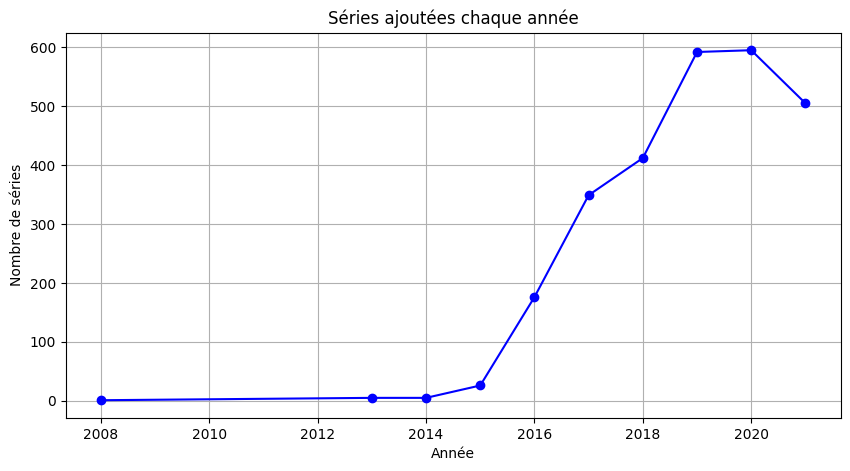

In [12]:
series = df[df['type'] == 'TV Show']
series_per_year = series.groupby('year_added').size()

series_per_year.plot(kind='line', marker='o', color='blue', figsize=(10, 5))
plt.title("Séries ajoutées chaque année")
plt.xlabel("Année")
plt.ylabel("Nombre de séries")
plt.grid(True)
plt.show()


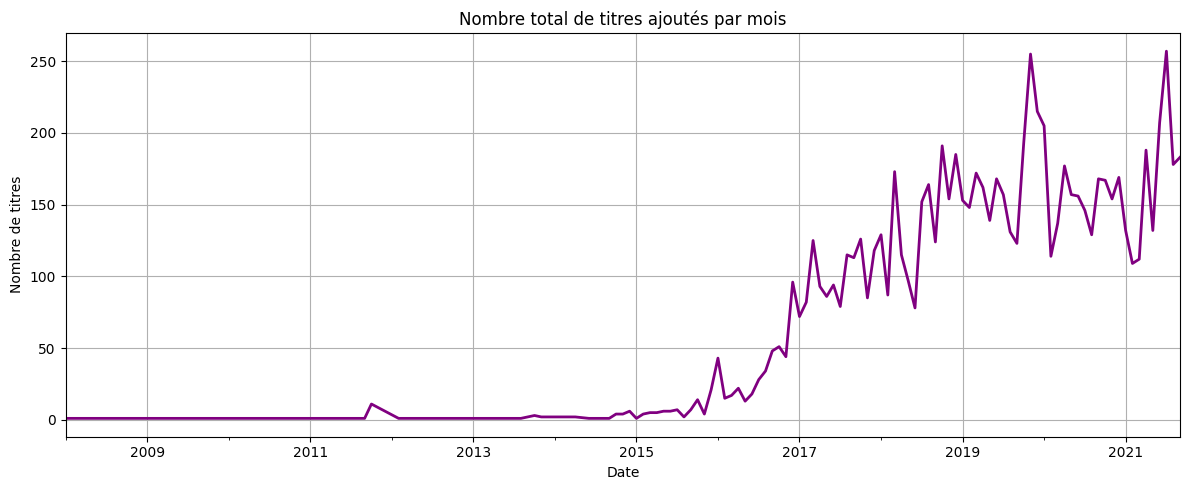

In [14]:
monthly = df.groupby('year_month').size()

# Graphique des ajouts mensuels
plt.figure(figsize=(12, 5))
monthly.plot(kind='line', linewidth=2, color='purple')
plt.title("Nombre total de titres ajoutés par mois")
plt.xlabel("Date")
plt.ylabel("Nombre de titres")
plt.grid(True)
plt.tight_layout()

# Sauvegarder le graphique
plt.savefig("images/netflix_mensuel.png", dpi=150, bbox_inches='tight')
plt.show()
